## First Dataset

Download MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

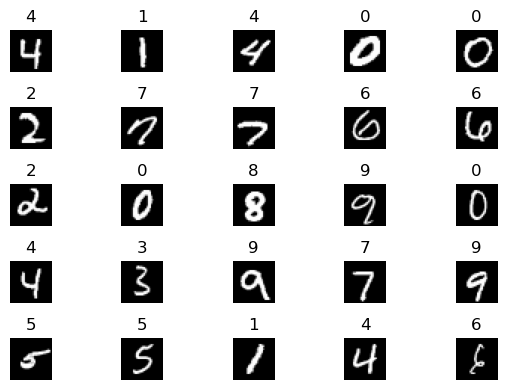

In [2]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
	ax = plt.subplot(5, 5, ix + 1)
	i = random.randint(0, len(X_train)-1)
	img, label = X_train[i], y_train[i]
	ax.imshow(img.reshape(28,28), cmap='gray')
	ax.set_title(label)
	ax.axis('off')
plt.tight_layout()
plt.show()

In this first iteration, we will make a simple binary classifier that detects only the number 3. Later we will complicate the requirements, which will give us the option to generate different versions of our dataset.

In [3]:
import numpy as np

X_train_3 = X_train[y_train == '3'][:200]
X_train_no_3 = X_train[y_train != '3'][:200]

len(X_train_3), len(X_train_no_3)

(200, 200)

In [4]:
def plot_sample(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X)-1)
        img = X[i]
        ax.imshow(img.reshape(28,28), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

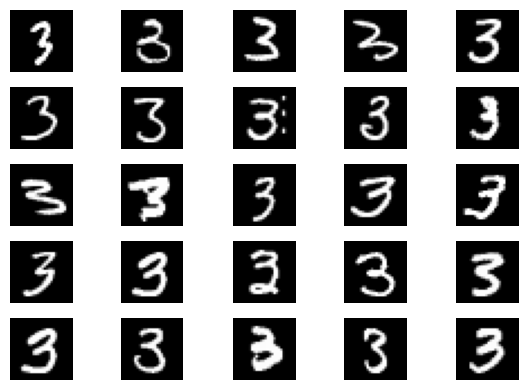

In [5]:
plot_sample(X_train_3)

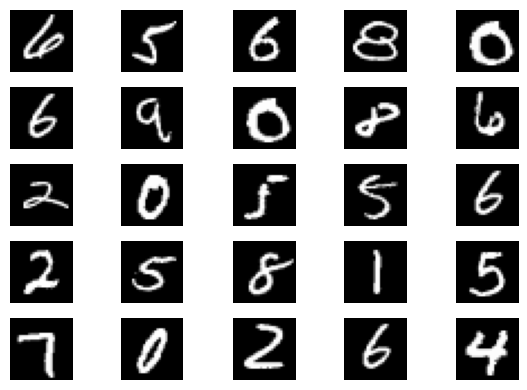

In [6]:
plot_sample(X_train_no_3)

Now we will save the images in folders, also separating 20% of the samples for the test set.

In [7]:
import os 
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
	shutil.rmtree(path, ignore_errors=True)
	os.makedirs(path, exist_ok=True)

	splits = ['train', 'test']
	for split in splits:
		os.makedirs(path / split, exist_ok=True)
		os.makedirs(path / split / '3', exist_ok=True)
		os.makedirs(path / split / 'no3', exist_ok=True)
		if split == 'train':
			X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
		else:
			X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
		for x1, x2 in zip(X1, X2):
			imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
			imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))

In [8]:
generate_dataset(X_train_3, X_train_no_3, 40)

In [9]:
from glob import glob

def get_paths():
	train_3 = glob(str(path / 'train' / '3' / '*.png'))
	train_no3 = glob(str(path / 'train' / 'no3' / '*.png'))
	test_3 = glob(str(path / 'test' / '3' / '*.png'))
	test_no3 = glob(str(path / 'test' / 'no3' / '*.png'))
	return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)

In [10]:
from skimage.io import imread 

def plot_images(paths):
	fig = plt.figure(dpi=100)
	for ix in range(25):
		ax = plt.subplot(5, 5, ix + 1)
		i = random.randint(0, len(paths)-1)
		img = imread(paths[i])
		ax.imshow(img, cmap='gray')
		ax.axis('off')
	plt.tight_layout()
	plt.show()

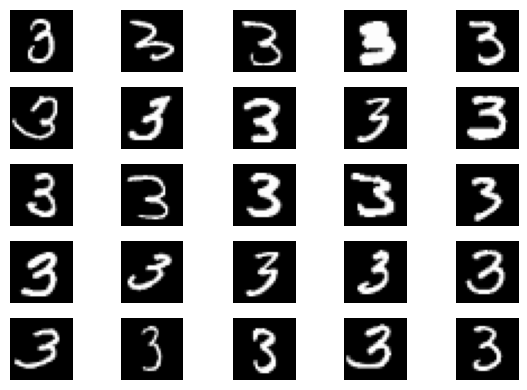

In [11]:
plot_images(train_3)

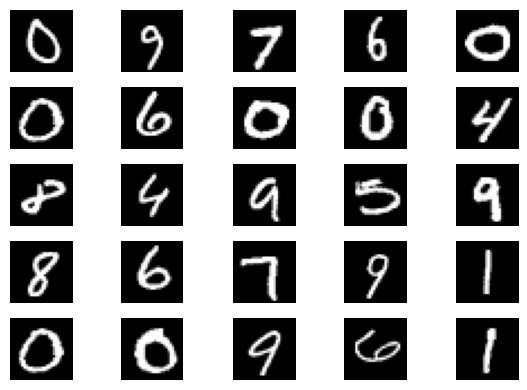

In [12]:
plot_images(train_no3)

## Data Versioning

At this point we have generated a first version of our dataset that we want to use to train our first model, in the future the dataset will evolve, adding more examples and classes.

So, to handle our data, we will use a specific version control tool for working with big data in machine learning environments known as "dvc".